<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/DEADPOOL/Library_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7: Comparison between libraries**

## **Group Members**
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
|MUHAMMAD AMIR JAMIL BIN JAMLUS          | A21EC0202     |Polars|
|KEE SHIN PEARL         | A21EC0190     |Comparison|
|MUHAMMAD IZZUDDIN BIN SHABRIN           | A21EC0083   |Dask|
|UMAR HAZIQ BIN MUHAMAD NORHISHAM            |  A21EC0235   |Pandas|



##**About the Dataset**
The dataset that we will use for this project is Anime Dataset 2023 which compromises of three csv files, which are anime-dataset-2023.csv, users-details-2023.csv, and users-score-2023.csv.However, we will only use one file which is users-score-2023.csv and this dataset can be accessed through this [link](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?select=users-score-2023.csv)

The columns and its description of the dataset is as show below:

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: |
|user_id | Unique ID for each user     |
|Username| The username of the user|
|anime_id           |Unique ID for each anime.|
|Anime Title            | The title of the anime|
|rating            |  The rating given by the user to the anime.|


The User Score Dataset enables various analyses and insights into user interactions with anime. By examining user ratings for different anime titles, you can identify highly-rated and popular anime among users. Additionally, you can explore user preferences and watch patterns for specific anime titles. This dataset also forms the foundation for building recommendation systems based on user ratings, helping to suggest anime that align with individual tastes. Furthermore, you can perform collaborative filtering and similarity analysis to discover patterns of similar user interests. Overall, this dataset offers valuable information for understanding user engagement and preferences on the anime platform.





## **Downloading the Dataset**

For the dataset, we will upload the dataset directly from Kaggle through Kaggle API


Install Kaggle Library


In [1]:
! pip install kaggle

Upload the kaggle API through this command

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


Make a directory named “.kaggle”

In [3]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Copy the “kaggle.json” into this new directory

In [4]:
! cp kaggle.json ~/.kaggle/

Allocate the required permission for this file.

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

To download the dataset into Colab we will use another command followed by the dataset name

In [6]:
! kaggle datasets download -d dbdmobile/myanimelist-dataset -f users-score-2023.csv

users-score-2023.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


Extract and unzip the dataset

In [7]:
! unzip users-score-2023.csv.zip

Archive:  users-score-2023.csv.zip
replace users-score-2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

The dataset has been downloaded and extracted.

## **Data Preparation and Cleaning**

In this section, we will load the dataset into the dataframe, explore the dataset, handle missing, incorrect and invalid data in the dataframe



###**Install Dask**

In [8]:
! pip install dask

###**Import Necessary Libraries**

In [9]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from dask.distributed import Client
from dask import delayed

###**Load the Dataset into Dask DataFrame**

In [10]:
ddf = dd.read_csv('/content/users-score-2023.csv')
df= ddf.compute()

###**Explore the number of rows & columns, ranges of values etc.**

Display the dataframe

In [11]:
df

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
1301883,1291087,Oblongata,10611,R-15,3
1301884,1291087,Oblongata,174,Tenjou Tenge,6
1301885,1291097,JuunanaSai,1535,Death Note,9
1301886,1291097,JuunanaSai,226,Elfen Lied,10


Dask dataframe is lazy, hence the data will only be loaded when it needed for computation. We can observe above that no data is printed, and it is replaced with ellipses.

In [12]:
df.columns

Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')

Calculate and display the number of row in the dataset

In [13]:
df.shape[0]

24325191

Display the type for each column

In [14]:
df.dtypes

user_id         int64
Username       object
anime_id        int64
Anime Title    object
rating          int64
dtype: object

###**Handle missing, incorrect and invalid data**

Drop duplicates if exist

In [15]:
df.drop_duplicates()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
1301883,1291087,Oblongata,10611,R-15,3
1301884,1291087,Oblongata,174,Tenjou Tenge,6
1301885,1291097,JuunanaSai,1535,Death Note,9
1301886,1291097,JuunanaSai,226,Elfen Lied,10


Drop rows with missing values if exist

In [16]:
df.dropna()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
1301883,1291087,Oblongata,10611,R-15,3
1301884,1291087,Oblongata,174,Tenjou Tenge,6
1301885,1291097,JuunanaSai,1535,Death Note,9
1301886,1291097,JuunanaSai,226,Elfen Lied,10


## **Exploratory Analysis and Visualization**

EDA analysis is used to gain any meaningful information from the dataset with the help of visualization, statistical measures, and any relevant EDA techniques that can help to increase the understanding of the dataset.

In EDA analysis, we will complete this task:

*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.

*   Explore relationship between columns using scatter plots, bar charts etc.









###**Compute the mean, sum, range and other interesting statistics for numeric columns**

In [17]:
pd.options.display.float_format = '{:.2f}'.format
print(df['rating'].describe())
pd.reset_option('display.float_format')



count   24325191.00
mean           7.62
std            1.66
min            1.00
25%            7.00
50%            8.00
75%            9.00
max           10.00
Name: rating, dtype: float64


###**Explore distributions of numeric columns using histograms etc.**

Distribution of Rating

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45607
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37603'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37193'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:45377', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:45377
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54950
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38657', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38657
INFO:distributed.core:Sta

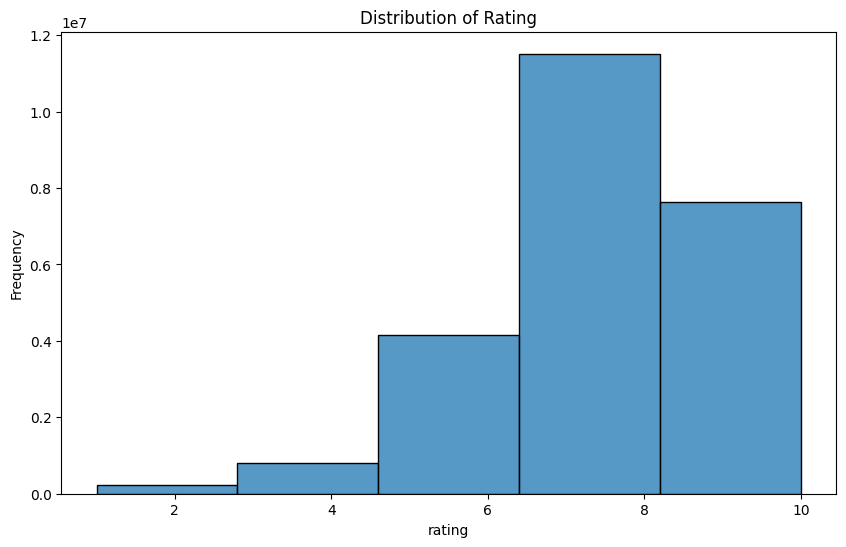

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37603'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37193'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54966; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:38657', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429516.3725672')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54950; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:45377', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429516.3923986')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:S

CPU times: user 23.5 s, sys: 2.07 s, total: 25.6 s
Wall time: 36 s


In [18]:
%%time
client = Client()

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5)
plt.title(f'Distribution of Rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()
client.close()

This histogram shown the distribution of the rating by observing the frequncy of each rating.

Count of Rating By Anime(Top 10)

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41861 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45025
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:41861/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44581'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43941'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44411', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:44411
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:36296
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37965', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

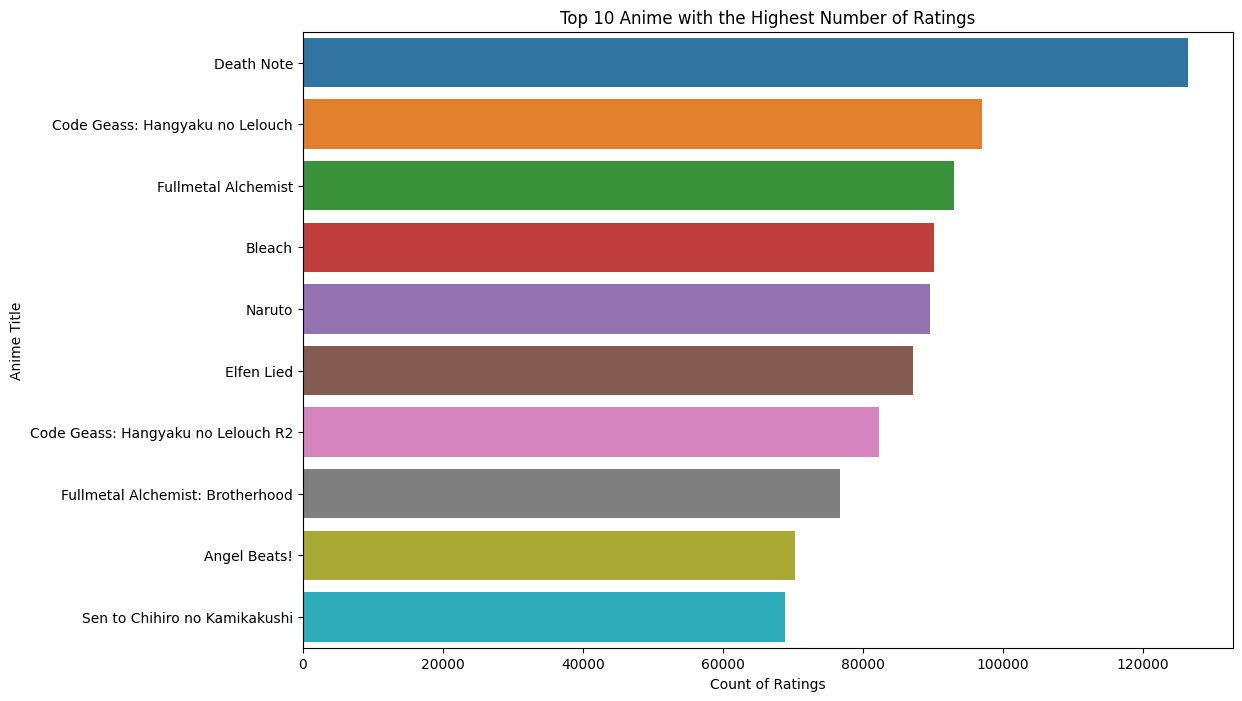

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:44581'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43941'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36296; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:44411', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703431644.8509772')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:36298; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:37965', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703431644.8728995')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:S

CPU times: user 4.08 s, sys: 248 ms, total: 4.33 s
Wall time: 7.53 s


In [39]:
%%time
client = Client()

top_anime = df['Anime Title'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_anime.values, y=top_anime.index, order=top_anime.index)
plt.title('Top 10 Anime with the Highest Number of Ratings')
plt.xlabel('Count of Ratings')
plt.ylabel('Anime Title')
plt.show()

client.close()

Find the Top 10 Animes


/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37699 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:32917
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:37699/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37281'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44063'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42993', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42993
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:52942
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:46319', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

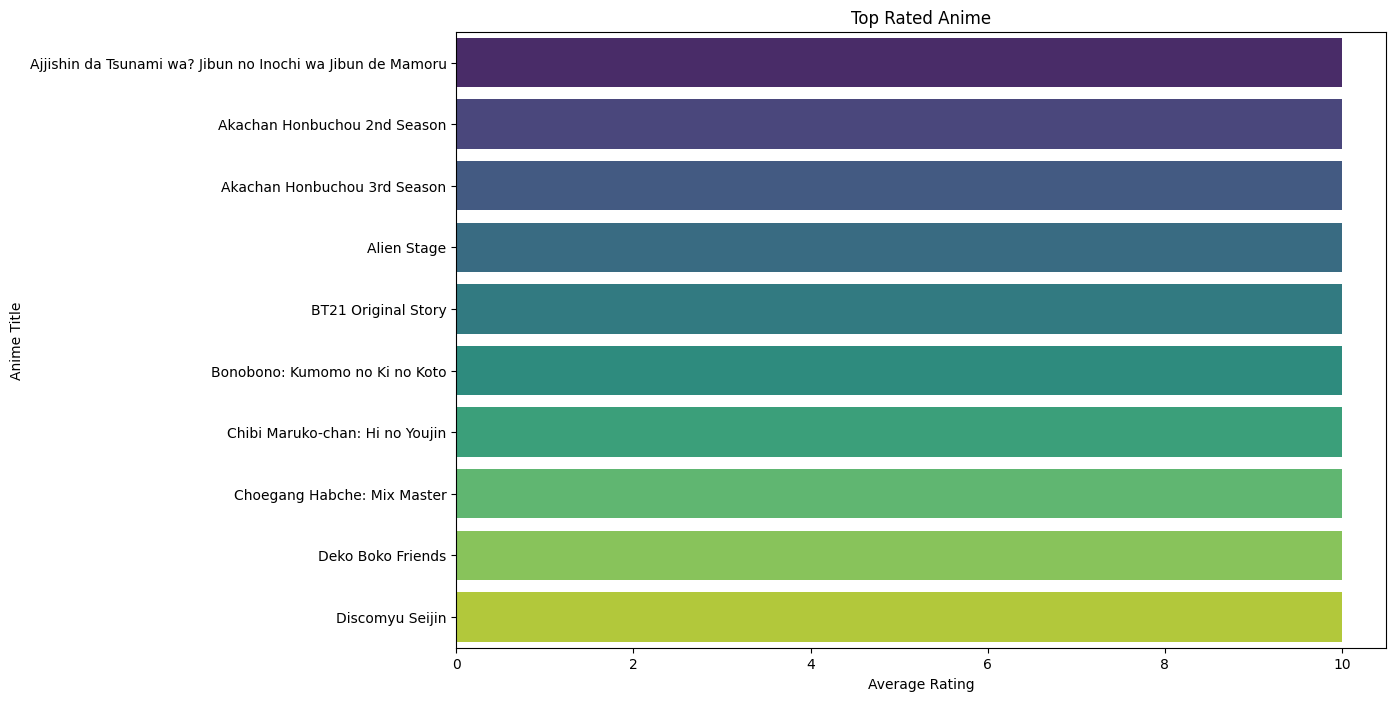

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:37281'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:44063'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:52942; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:42993', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429694.1945727')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:52954; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:46319', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429694.2166266')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:S

CPU times: user 4.69 s, sys: 745 ms, total: 5.43 s
Wall time: 7.89 s


In [21]:
%%time
client = Client()

avg_ratings = df.groupby('Anime Title')['rating'].mean()

top_rated = avg_ratings.nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
plt.title('Top Rated Anime')
plt.xlabel('Average Rating')
plt.ylabel('Anime Title')
plt.show()
client.close()

Relationship between Anime ID and Rating

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36791 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42949
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:36791/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42833'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34079'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40717', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40717
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:56004
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39829', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

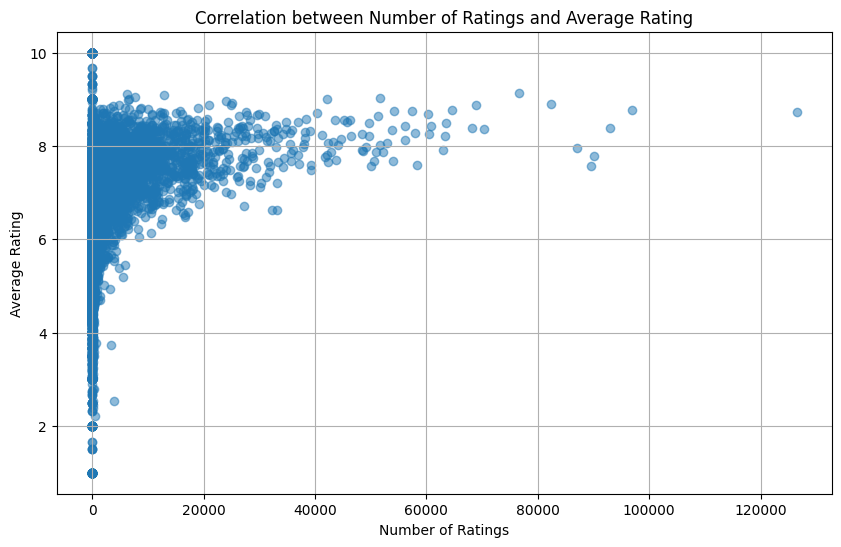

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:42833'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34079'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:56004; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:40717', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703430022.0111506')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:55998; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:39829', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703430022.0417724')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:S

CPU times: user 2.1 s, sys: 561 ms, total: 2.66 s
Wall time: 6.23 s


In [28]:
%%time
client = Client()
agg_data = df.groupby('anime_id')['rating'].agg(['mean', 'count'])
agg_data.columns = ['Average Rating', 'Number of Ratings']
plt.figure(figsize=(10, 6))
plt.scatter(agg_data['Number of Ratings'], agg_data['Average Rating'], alpha=0.5)
plt.title('Correlation between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
client.close()

## **Asking and Answering Questions**

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which anime has the most frequency and what the average of its rating and its count?

---
Answer:Display anime that have the highest occurance, calculate the average rating of the anime, and display the number of occurance of said anime.


In [42]:
from prettytable import PrettyTable

#%%time

client = Client()
most_frequent_anime = df['Anime Title'].value_counts().idxmax()
anime_count = df[df['Anime Title']==most_frequent_anime].value_counts().sum()
average_rating_most_frequent_anime = df[df['Anime Title'] == most_frequent_anime]['rating'].mean()


client.close()
table = PrettyTable()
table.field_names = ["Anime Title", "Occurance", "Average Rating"]
table.add_row([most_frequent_anime, anime_count, f"{average_rating_most_frequent_anime:.2f}"])
print(table)

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46091 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44551
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:46091/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39837'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44505'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34759', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:34759
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:41978
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42011', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

+-------------+-----------+----------------+
| Anime Title | Occurance | Average Rating |
+-------------+-----------+----------------+
|  Death Note |   126492  |      8.72      |
+-------------+-----------+----------------+


#### Q2: What is the average rating given by each user?

---

Answer: Sum every rating given by each user, then divide by its occurance.

In [43]:
%%time
client = Client()
average_user_ratings = df.groupby("user_id")["rating"].mean()
print("Average rating given by each user:\n", average_user_ratings)

client.close()

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42965 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46769
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:42965/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44607'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38311'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37111', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37111
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:44366
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:34593', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

Average rating given by each user:
 user_id
1          7.438931
4          6.524648
9          7.707692
20         8.057143
23         7.457447
             ...   
1291057    7.004167
1291079    8.478723
1291085    8.220339
1291087    7.533333
1291097    9.666667
Name: rating, Length: 270033, dtype: float64


INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Scheduler closing all comms


CPU times: user 1.39 s, sys: 366 ms, total: 1.76 s
Wall time: 6.1 s


#### Q3: How many unique users and animes are there in the dataset?

---

Answer:Calculate the unique number of user and anime.

In [45]:
%%time
client = Client()
unique_users = df["user_id"].nunique()
unique_animes = df["anime_id"].nunique()

table = PrettyTable()
table.field_names = ["Category", "Count"]

table.add_row(["Unique Users", unique_users])
table.add_row(["Unique Animes", unique_animes])

print(table)
client.close()

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44659 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:39125
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:44659/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38565'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40757'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40515', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40515
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51580
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38953', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

+---------------+--------+
|    Category   | Count  |
+---------------+--------+
|  Unique Users | 270033 |
| Unique Animes | 16500  |
+---------------+--------+


INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Scheduler closing all comms


CPU times: user 948 ms, sys: 84.6 ms, total: 1.03 s
Wall time: 4.3 s


#### Q4: Who are the top 10 user that gave the ratings the most?

---

Answer: Calculate the number of occurance for each username and display top 10 username that have the most occurance.

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39783 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36777
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:39783/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33075'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46327'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42559', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42559
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:43336
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41845', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

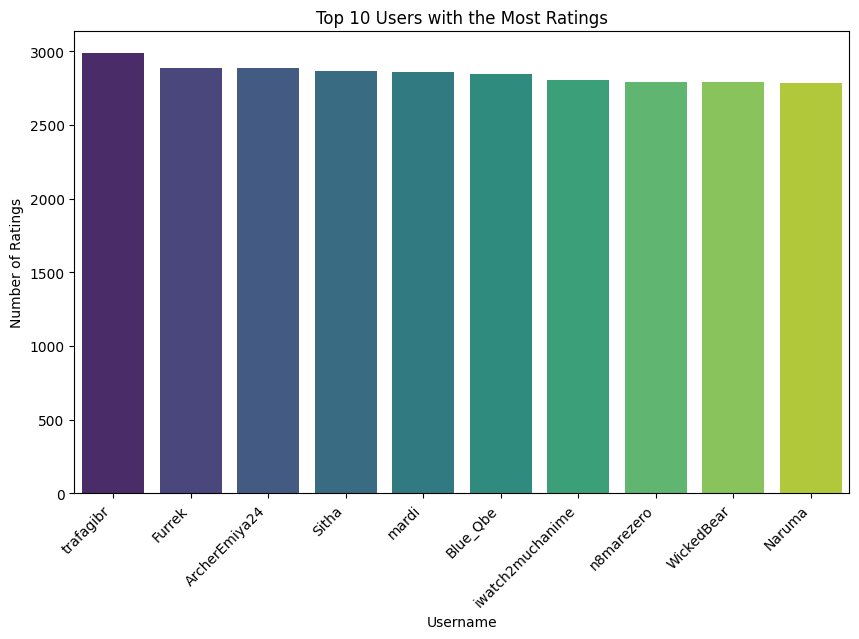

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33075'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:46327'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:43320; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:41845', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429777.6333976')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:43336; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:42559', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1703429777.6684783')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:S

CPU times: user 2.09 s, sys: 188 ms, total: 2.28 s
Wall time: 4.27 s


In [26]:
%%time
client = Client()

top_10_users = df['Username'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_users.index, y=top_10_users.values, palette='viridis')
plt.title('Top 10 Users with the Most Ratings')
plt.xlabel('Username')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

client.close()

#### Q5: what is the anime with the worst rating and what is the average rating for that anime?

---

Answer: Calculate the anime with the worst rating and its average rating



In [37]:
%%time
client = Client()
worst_rated_anime = df.groupby("Anime Title")["rating"].mean().idxmin()
average_rating_worst_anime = df[df["Anime Title"] == worst_rated_anime]["rating"].mean()

client.close()

table = PrettyTable()
table.field_names = ["Anime Title", "Worst Rated Anime", "Average Rating"]
table.add_row([worst_rated_anime, worst_rated_anime, f"{average_rating_worst_anime:.2f}"])

print(table)


/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38593 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43507
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:38593/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37903'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39119'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40877', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40877
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:39532
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42075', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

+----------------+-------------------+----------------+
|  Anime Title   | Worst Rated Anime | Average Rating |
+----------------+-------------------+----------------+
| Ao Fei Q Chong |   Ao Fei Q Chong  |      1.00      |
+----------------+-------------------+----------------+
CPU times: user 7.3 s, sys: 782 ms, total: 8.08 s
Wall time: 10.6 s


##**Conclusion**


###**Advantages of Dask**

1.   Scalability:Dask makes it possible for users to scale their computations from a single machine to a cluster of machines by enabling distributed and parallel computing.
2.   Lazy Evaluation:Because Dask uses lazy evaluation, users can construct complex computations and then execute them only when needed. This may result in the usage of resources more effectively.
3.   Parallel Processing:Dask has the ability to parallelize operations across several cores, which improves computation speed for tasks that support it.
4.   Handling Large Datasets:Users can work with datasets that would be impractical to process in-memory since Dask is built to handle datasets that are larger than the available RAM.









###**Disadvatages of Dask**

1.   Limited Functionality:Despite covering a wide range of use cases, Dask might not be able to fully mimic all the functionality of in-memory libraries such as Pandas or NumPy. Some advanced functions might not be available or be restricted.

2.   Overhead:Because Dask uses distributed computing and job coordination, there is some overhead. The overhead might be more than the advantages for some simple calculations.

3.   Complexity in Debugging:It can be more difficult to troubleshoot distributed calculations than single-machine computations. Identifying and fixing problems could take more work.

4.   Learning Curve:When switching to Dask, users who are not familiar with distributed computing ideas may encounter a learning curve, particularly when working with distributed installations.




###**Consideration when using Dask**

1.   Data Size and Distribution:Take into account the quantity and dispersion of your data. Dask works well with big datasets, but when the data can be spread across several machines, the performance advantages are greater.

2.   Resource Management:Use resources carefully, especially when interacting with dispersed clusters. Efficient computation requires careful resource allocation and monitoring.

3.   Task Scheduling:Recognise Dask's task scheduling features and adjust them to meet your needs. Task scheduling that is effective can have a big impact on output.





###**Summary**
Dask is a scalable Python framework for distributed and parallel computing that facilitates the effective handling of huge datasets. It provides a familiar API, easily interacts with current Python tools, and enables users to parallelize calculations across cores or clusters. Lazy evaluation, which makes it appropriate for out-of-memory data, is one of its key advantages. Data science and machine learning frequently employ it to speed up data processing operations.
